In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from random import randrange

from api_keys import g_key
from api_keys import weather_api_key

In [2]:
#Generate City List

#Initialize variables and url
num_city=50
url = "http://api.openweathermap.org/data/2.5/weather?"
city_list=pd.DataFrame({'City Name': [], 
                        'Lat': [], 
                        'Long': [],
                        'Max Temp': [], 
                        'Cloudiness': [],
                        'Humidity': [], 
                        'Wind Speed':[]})
country_val=[[]]*num_city
units='imperial'

#Run api loop for each city
for x in range(num_city):
    
    #keep trying this loop until a city is found
    isreal=0
    while isreal==0:
        #find random coordinates
        lat_rand=randrange(-89,89)
        long_rand=randrange(-179,179)
        #Find closest city
        city=citipy.nearest_city(lat_rand,long_rand)
        #Pause for api usage limit
        time.sleep(1.1)
        try:
            #force error if random city is already in list
            if x!=0:
                if city_list['City Name'].str.contains(city.city_name).sum()>0:
                    p=1/0
            try:
                #determine if city name is not found in weather
                city_list.at[x,'City Name']=city.city_name
                query_url = f"{url}appid={weather_api_key}&q={city.city_name}&units={units}"
                #Call for city name and place information
                weather_response = requests.get(query_url)
                weather_json = weather_response.json()
                country_val[x]=weather_json['sys']['country']
                city_list.at[x,'Lat']=weather_json['coord']['lat']
                city_list.at[x,'Long']=weather_json['coord']['lon']
                city_list.at[x,'Max Temp']=weather_json['main']['temp_max']
                city_list.at[x,'Cloudiness']=weather_json['clouds']['all']
                city_list.at[x,'Humidity']=weather_json['main']['humidity']
                city_list.at[x,'Wind Speed']=weather_json['wind']['speed']
                isreal=1
                print(f'City number {x+1} found: {city.city_name}')
            except:
                print('No City was Found.... Rerolling City')
        except:
            print('Found Same City... Rerolling City')
#Add country because it didn't like adding it before
city_list=city_list.join(pd.DataFrame({"Country":country_val}), how='outer')
#remove too humid values
city_list_too_humid=city_list.loc[city_list['Humidity']>=100].reset_index(drop=True)
city_list=city_list.loc[city_list['Humidity']<100].reset_index(drop=True)
#Save to list
city_list.to_csv('WeatherPy/city_data.csv',index=False)
city_list.head()

City number 1 found: rikitea
City number 2 found: ancud
City number 3 found: batemans bay
City number 4 found: qaanaaq
No City was Found.... Rerolling City
City number 5 found: hobart
City number 6 found: mataura
City number 7 found: faanui
No City was Found.... Rerolling City
City number 8 found: ushuaia
City number 9 found: mezhdurechensk
City number 10 found: cherskiy
City number 11 found: puerto del rosario
City number 12 found: gorontalo
Found Same City... Rerolling City
City number 13 found: east london
City number 14 found: punta arenas
City number 15 found: bredasdorp
City number 16 found: luorong
City number 17 found: sao joao da barra
City number 18 found: barrow
City number 19 found: katsuura
City number 20 found: bethel
City number 21 found: saldanha
City number 22 found: puerto carreno
City number 23 found: arraial do cabo
City number 24 found: khajuraho
City number 25 found: talnakh
Found Same City... Rerolling City
City number 26 found: shingu
City number 27 found: kruis

,City Name,Lat,Long,Max Temp,Cloudiness,Humidity,Wind Speed,Country
0,rikitea,-23.12,-134.97,73.33,100.0,84.0,20.69,PF
1,ancud,-41.87,-73.82,48.99,92.0,97.0,20.00,CL
2,qaanaaq,77.48,-69.36,25.86,98.0,77.0,9.10,GL
3,hobart,-42.88,147.33,48.20,99.0,66.0,12.75,AU
4,mataura,-46.19,168.86,42.01,54.0,87.0,1.41,NZ


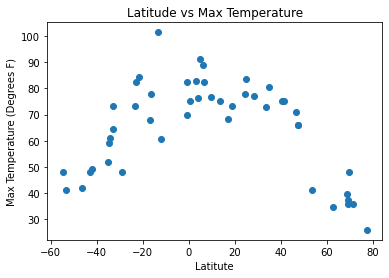

In [19]:
#Plot Data

#Plot Lat vs Temp
plt.scatter(city_list['Lat'],city_list['Max Temp'])
plt.title('Latitude vs Max Temperature')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')
plt.savefig('WeatherPy/LatvsTemp.png')
plt.show()

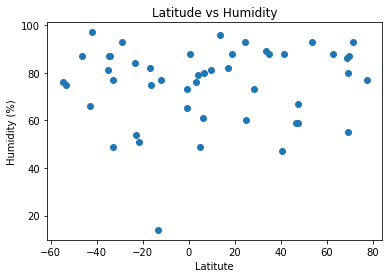

In [20]:
#Plot Lat vs Humidity
plt.scatter(city_list['Lat'],city_list['Humidity'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')
plt.savefig('WeatherPy/LatvsHumidity.png')
plt.show()

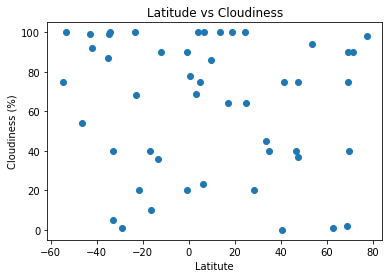

In [21]:
#Plot Lat vs Cloudiness
plt.scatter(city_list['Lat'],city_list['Cloudiness'])
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')
plt.savefig('WeatherPy/LatvsCloudiness.png')
plt.show()

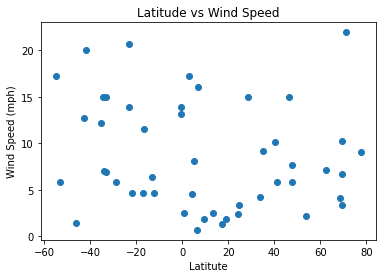

In [22]:
#Plot Lat vs Wind Speed
plt.scatter(city_list['Lat'],city_list['Wind Speed'])
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')
plt.savefig('WeatherPy/LatvsWindSpeed.png')
plt.show()

In [23]:
#Generate north and south dataframes
city_list_n=city_list.loc[city_list['Lat']>=0]
city_list_s=city_list.loc[city_list['Lat']<0]

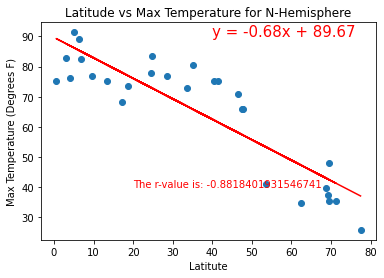

In [24]:
#Plot Lat vs Temp for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Max Temp'])
plt.title('Latitude vs Max Temperature for N-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Max Temp'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,90),fontsize=15,color="red")
plt.annotate(r_string,(20,40),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsTemp_north.png')
plt.show()

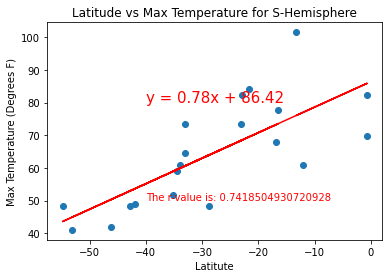

In [25]:
#Plot Lat vs Temp for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Max Temp'])
plt.title('Latitude vs Max Temperature for S-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (Degrees F)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Max Temp'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.annotate(r_string,(-40,50),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsTemp_south.png')
plt.show()

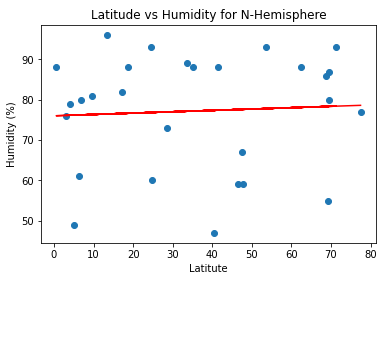

In [26]:
#Plot Lat vs Humidity for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Humidity'])
plt.title('Latitude vs Humidity for N-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Humidity'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,100),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsHumidity_north.png')
plt.show()

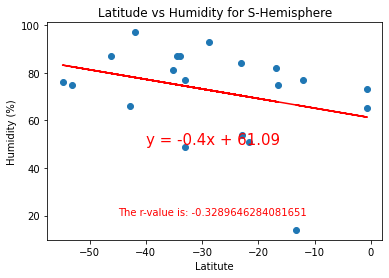

In [27]:
#Plot Lat vs Humidity for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Humidity'])
plt.title('Latitude vs Humidity for S-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Humidity'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.annotate(r_string,(-45,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsHumidity_south.png')
plt.show()

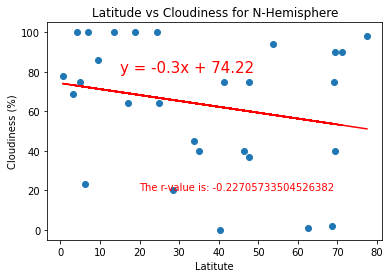

In [28]:
#Plot Lat vs Cloudiness for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Cloudiness'])
plt.title('Latitude vs Cloudiness for N-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Cloudiness'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,80),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsCloudiness_north.png')
plt.show()

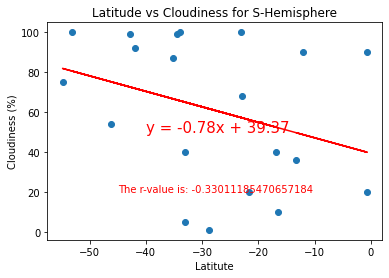

In [29]:
#Plot Lat vs Cloudiness for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Cloudiness'])
plt.title('Latitude vs Cloudiness for S-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Cloudiness'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.annotate(r_string,(-45,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsCloudiness_south.png')
plt.show()

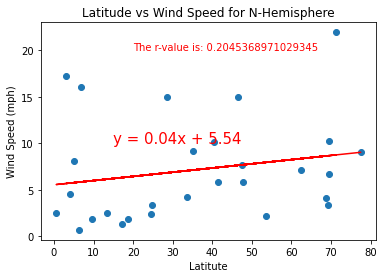

In [30]:
#Plot Lat vs Wind Speed for Northern Hemisphere
plt.scatter(city_list_n['Lat'],city_list_n['Wind Speed'])
plt.title('Latitude vs Wind Speed for N-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_n['Lat'],city_list_n['Wind Speed'])
regress_values = city_list_n['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_n['Lat'],regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.annotate(r_string,(20,20),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsWindSpeed_north.png')
plt.show()

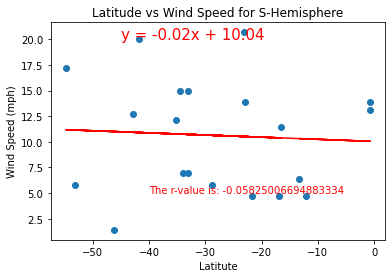

In [31]:
#Plot Lat vs Wind Speed for Southern Hemisphere
plt.scatter(city_list_s['Lat'],city_list_s['Wind Speed'])
plt.title('Latitude vs Wind Speed for S-Hemisphere')
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (mph)')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_list_s['Lat'],city_list_s['Wind Speed'])
regress_values = city_list_s['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(city_list_s['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.annotate(r_string,(-40,5),fontsize=10,color="red")

plt.savefig('WeatherPy/LatvsWindSpeed_south.png')
plt.show()